In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/PRABHAV-RA2011003011010/Graduate_Admission_Prediction/refs/heads/main/Admission_Predict.csv"
df = pd.read_csv(url)
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:
df.shape

(400, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [ ]:
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(320, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled[0]

array([0.22      , 0.17857143, 0.25      , 0.5       , 0.42857143,
       0.25      , 1.        ])

Covert Numpy arrays to Pytorch tensors

In [ ]:
X_train_tensor = torch.from_numpy(X_train.values.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.values.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.values.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.values.astype(np.float32))

In [ ]:
y_train_tensor

tensor([0.4400, 0.9500, 0.7100, 0.6200, 0.6400, 0.4700, 0.7300, 0.9600, 0.7100,
        0.7800, 0.5200, 0.7300, 0.8000, 0.8100, 0.5300, 0.6200, 0.7000, 0.7900,
        0.8700, 0.8900, 0.9200, 0.5700, 0.7300, 0.4400, 0.7400, 0.8400, 0.8400,
        0.6400, 0.9000, 0.7400, 0.7100, 0.4700, 0.9000, 0.6300, 0.7500, 0.3800,
        0.7200, 0.8000, 0.8400, 0.8200, 0.4800, 0.6400, 0.6200, 0.7500, 0.7300,
        0.4200, 0.9400, 0.7800, 0.7000, 0.9500, 0.7100, 0.6400, 0.7200, 0.8900,
        0.7000, 0.6800, 0.6400, 0.7700, 0.5700, 0.3400, 0.6100, 0.6700, 0.6100,
        0.8000, 0.6900, 0.5600, 0.6200, 0.4500, 0.8900, 0.6600, 0.7700, 0.9200,
        0.6900, 0.8800, 0.8200, 0.7500, 0.9400, 0.5200, 0.9300, 0.6400, 0.6800,
        0.7100, 0.5600, 0.8100, 0.7000, 0.5300, 0.5700, 0.7300, 0.8700, 0.7000,
        0.4700, 0.8400, 0.8000, 0.9300, 0.8600, 0.8300, 0.6200, 0.7100, 0.9400,
        0.6100, 0.8500, 0.8100, 0.8200, 0.3900, 0.8000, 0.6200, 0.9200, 0.6100,
        0.5200, 0.9100, 0.5400, 0.8500, 

In [ ]:
y_train_tensor.shape

torch.Size([320])

Pytorch Starts!!!

In [ ]:
#Dataset and DataLoader
from torch.utils.data import Dataset,DataLoader

In [ ]:
class CustomDataset(Dataset):

  def __init__(self,x_tensor,y_tensor):
    self.x=x_tensor
    self.y=y_tensor

  def __len__(self):
    return len(self.x)

  def __getitem__(self,index):
    return (self.x[index],self.y[index])

In [ ]:
train_dataset = CustomDataset(X_train_tensor,y_train_tensor)
test_dataset = CustomDataset(X_test_tensor,y_test_tensor)

In [ ]:
len(test_dataset)

80

In [ ]:
train_dataset[0]

(tensor([301.0000,  97.0000,   2.0000,   3.0000,   3.0000,   7.8800,   1.0000]),
 tensor(0.4400))

In [ ]:
train_dataloader = DataLoader(train_dataset,batch_size=16,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=16,shuffle=True)

In [ ]:
print(train_dataloader)

In [ ]:
for X,Y in train_dataloader:
  print(X)
  print(Y)
  print("."*50)

tensor([[331.0000, 116.0000,   5.0000,   4.0000,   4.0000,   9.2600,   1.0000],
        [295.0000, 101.0000,   2.0000,   2.5000,   2.0000,   7.8600,   0.0000],
        [329.0000, 113.0000,   5.0000,   5.0000,   4.5000,   9.4500,   1.0000],
        [327.0000, 111.0000,   4.0000,   3.0000,   4.0000,   8.4000,   1.0000],
        [320.0000, 120.0000,   3.0000,   4.0000,   4.5000,   9.1100,   0.0000],
        [314.0000, 109.0000,   4.0000,   3.5000,   4.0000,   8.7700,   1.0000],
        [339.0000, 114.0000,   5.0000,   4.0000,   4.5000,   9.7600,   1.0000],
        [325.0000, 112.0000,   2.0000,   3.0000,   3.5000,   8.9600,   1.0000],
        [318.0000, 106.0000,   3.0000,   2.0000,   3.0000,   8.6500,   0.0000],
        [319.0000, 108.0000,   2.0000,   2.5000,   3.0000,   8.7600,   0.0000],
        [323.0000, 107.0000,   3.0000,   3.5000,   3.5000,   8.5500,   1.0000],
        [324.0000, 111.0000,   5.0000,   4.5000,   4.0000,   9.1600,   1.0000],
        [311.0000, 105.0000,   2.0000,  

In [ ]:
#Defining our model using Pytorch
import torch.nn as nn

class Model(nn.Module):

  def __init__(self,input_features):
    super().__init__()
    self.layers=nn.Sequential(
        nn.Linear(input_features,out_features=5),
        nn.ReLU(),
        nn.Linear(in_features=5,out_features=1),

    )

  def forward(self,features):
      return self.layers(features)

In [ ]:
#Important Parameters
learning_rate = 0.1
epochs = 25
loss_function = nn.MSELoss()


Training Pipeline

In [ ]:
model = Model(X_train_tensor.shape[1])
y_pred=model(X_train_tensor)
y_pred

tensor([[15.6831],
        [18.6850],
        [17.6249],
        [17.0455],
        [16.7644],
        [16.2680],
        [16.9612],
        [18.6808],
        [17.2819],
        [17.8504],
        [16.2059],
        [17.1273],
        [17.7600],
        [17.3385],
        [16.0252],
        [16.9690],
        [16.6276],
        [17.3196],
        [17.3302],
        [17.8756],
        [17.4352],
        [16.1730],
        [16.5136],
        [15.9109],
        [17.2454],
        [17.3369],
        [17.1257],
        [16.2129],
        [17.9604],
        [16.8825],
        [17.1043],
        [16.0675],
        [18.5402],
        [17.1716],
        [17.1240],
        [15.5068],
        [17.1364],
        [17.5305],
        [17.1083],
        [17.5663],
        [16.9066],
        [16.7232],
        [16.1785],
        [17.4666],
        [17.5813],
        [16.8899],
        [18.4450],
        [17.8184],
        [17.4521],
        [18.3986],
        [17.2778],
        [15.8586],
        [16.

In [ ]:
#initialize a model
model = Model(X_train_tensor.shape[1])

#define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
train_loss=[]
val_loss=[]
for epoch in range(epochs):

  for batch_x,batch_y in train_dataloader:

    y_pred=model(batch_x)
    loss=loss_function(y_pred,batch_y.unsqueeze(1))

    #clear gradients
    optimizer.zero_grad()

    #backward pass
    loss.backward()

    #parameter update
    optimizer.step()

  # print loss in each epoch
  model.eval()
  with torch.no_grad():
      y_val_pred = model(X_test_tensor)
      valu_loss = criterion(y_val_pred.squeeze(), y_test_tensor)
      val_loss.append(valu_loss.item())
  train_loss.append(loss.item())
  print(f'Epoch: {epoch + 1}, Loss: {loss.item():.4f}')




Epoch: 1, Loss: 94442896.0000
Epoch: 2, Loss: 12560.0957
Epoch: 3, Loss: 1.6483
Epoch: 4, Loss: 0.0318
Epoch: 5, Loss: 0.0142
Epoch: 6, Loss: 0.0136
Epoch: 7, Loss: 0.0146
Epoch: 8, Loss: 0.0143
Epoch: 9, Loss: 0.0252
Epoch: 10, Loss: 0.0144
Epoch: 11, Loss: 0.0189
Epoch: 12, Loss: 0.0174
Epoch: 13, Loss: 0.0183
Epoch: 14, Loss: 0.0184
Epoch: 15, Loss: 0.0267
Epoch: 16, Loss: 0.0250
Epoch: 17, Loss: 0.0196
Epoch: 18, Loss: 0.0288
Epoch: 19, Loss: 0.0169
Epoch: 20, Loss: 0.0179
Epoch: 21, Loss: 0.0250
Epoch: 22, Loss: 0.0247
Epoch: 23, Loss: 0.0246
Epoch: 24, Loss: 0.0224
Epoch: 25, Loss: 0.0227


Model Testing & Evaluation

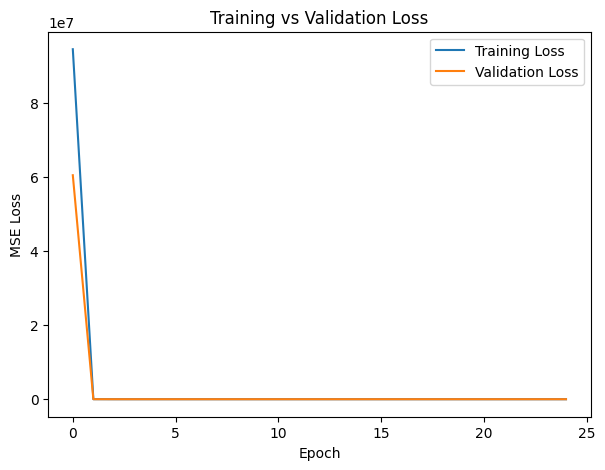


Final Test MSE: 0.0231


In [ ]:
# --- Plot Training vs Validation loss ---
plt.figure(figsize=(7, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# --- Final Test Evaluation ---
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    test_mse = torch.mean((y_test_pred.squeeze() - y_test_tensor) ** 2)
    print(f"\nFinal Test MSE: {test_mse.item():.4f}")

In [ ]:
len(train_loss)

25

In [ ]:
len(val_loss)

25

Using Optuna

In [ ]:
import torch.optim as optim
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
batch_size=16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

In [ ]:
class MyNN(nn.Module):

  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate):

    super().__init__()

    layers = []

    for i in range(num_hidden_layers):

      layers.append(nn.Linear(input_dim, neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer)) #to normalize the outputs of the previous layer
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim = neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, x):

    return self.model(x)

In [ ]:
# objective function
def objective(trial):

  # next hyperparameter values from the search space
  num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
  neurons_per_layer = trial.suggest_int("neurons_per_layer", 8, 128, step=8)
  epochs = trial.suggest_int("epochs", 10, 50, step=10)
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
  batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
  optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
  weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)



  # model init
  input_dim = 7
  output_dim = 1

  model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
  model.to(device)

  # optimizer selection
  criterion = nn.MSELoss()


  if optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  else:
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  # training loop

  for epoch in range(epochs):

    for batch_features, batch_labels in train_loader:

      # move data to gpu
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      # forward pass
      outputs = model(batch_features)

      # calculate loss
      loss = criterion(outputs, batch_labels.float())

      # back pass
      optimizer.zero_grad()
      loss.backward()

      # update grads
      optimizer.step()


  # evaluation
  model.eval()
  # evaluation on test data
  total = 0
  correct = 0

  with torch.no_grad():
      total_mse = 0.0
      total_samples = 0

      for batch_features, batch_labels in test_loader:
          # Move data to device
          batch_features = batch_features.to(device).float()
          batch_labels = batch_labels.to(device).float()

          # Forward pass
          outputs = model(batch_features).squeeze()  # shape: [batch_size]

          # Batch MSE
          mse = torch.mean((outputs - batch_labels) ** 2)

          # Accumulate weighted average
          total_mse += mse.item() * batch_labels.size(0)
          total_samples += batch_labels.size(0)

      # Compute final average MSE
      mse = total_mse / total_samples

  return mse


In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.9 MB/s eta 0:00:00


In [1]:
import optuna

study = optuna.create_study(direction='minimize')# For classification use maximize

ModuleNotFoundError: No module named 'optuna'

In [ ]:
study.optimize(objective, n_trials=10)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[I 2025-10-21 17:40:50,760] Trial 0 finished with value: 0.11989339590072631 and parameters: {'num_hidden_layers': 1, 'neurons_per_layer': 64, 'epochs': 20, 'learning_rate': 0.00010469278816900571, 'dropout_rate': 0.4, 'batch_size': 64, 'optimizer': 'RMSprop', 'weight_decay': 0.0005209018985963696}. Best is trial 0 with value: 0.11989339590072631.
[I 2025-10-21 17:40:55,131] Trial 1 finished with value: 0.1513366401195526 and par

In [ ]:
study.best_value

0.02348655164241791

In [ ]:
study.best_params

{'num_hidden_layers': 1,
 'neurons_per_layer': 104,
 'epochs': 40,
 'learning_rate': 0.06842072611021881,
 'dropout_rate': 0.2,
 'batch_size': 128,
 'optimizer': 'Adam',
 'weight_decay': 0.00012516834008659183}

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import optuna
import numpy as np
import random

# ✅ Optional: set seeds for reproducibility
torch.manual_seed(42) # Any random operations in PyTorch — like random weight initialization in neural networks, shuffling in DataLoader, or random tensor generation — will now produce the same output each time you run your script.
np.random.seed(42) # All NumPy random operations (e.g., np.random.rand(), np.random.randint()) will become reproducible.
random.seed(42) # Sets the random seed for Python’s built-in random module like random.random(), random.shuffle(), random.choice().

# Example: assuming you already have train_dataset and test_dataset loaded
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def objective(trial):

    # --- Hyperparameter search space ---
    num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 5)
    neurons_per_layer = trial.suggest_int("neurons_per_layer", 8, 128, step=8)
    epochs = trial.suggest_int("epochs", 10, 50, step=10)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])
    optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop'])
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-3, log=True)

    # --- Split training data into train + validation sets ---
    val_ratio = 0.2
    val_size = int(len(train_dataset) * val_ratio)
    train_data, val_data = random_split(train_dataset, [len(train_dataset) - val_size, val_size])

    # --- DataLoaders ---
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

    # --- Model initialization ---
    input_dim = 7
    output_dim = 1
    model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate)
    model.to(device)

    # --- Loss and optimizer setup ---
    criterion = nn.MSELoss()

    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # --- Training loop ---
    best_val_loss = float("inf")
    patience, patience_counter = 5, 0  # for early stopping

    for epoch in range(epochs):

        model.train()
        running_loss = 0.0

        for batch_features, batch_labels in train_loader:
            batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

            optimizer.zero_grad()                         # clears all the gradients
            preds = model(batch_features).squeeze()       # forward pass
            loss = criterion(preds, batch_labels.float()) # compute the mean of the individual losses
            loss.backward()                               # Compute gradients via backpropagation
            optimizer.step()                              # Update weights using gradients

            running_loss += loss.item()    # adding the loss of each batch, loss looks like tensor(2.3456), to get numerical we use loss.item()

        # --- Validation phase ---
        model.eval()
        val_loss = 0.0
        with torch.no_grad(): # disable gradient tracking / computation graph which are done by Autograd
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                preds = model(X_val).squeeze()
                val_loss += criterion(preds, y_val.float()).item()

        val_loss /= len(val_loader)
        trial.report(val_loss, epoch)  # Optuna reporting for pruning

        # --- Pruning unpromising trials ---
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

        # --- Early stopping ---
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    # --- Final evaluation on test set ---
    model.eval()
    total_mse = 0.0
    total_samples = 0
    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            preds = model(X_test).squeeze()
            mse = torch.mean((preds - y_test) ** 2)
            total_mse += mse.item() * y_test.size(0)
            total_samples += y_test.size(0)

    final_mse = total_mse / total_samples
    torch.cuda.empty_cache()  # free GPU memory for next trial

    return final_mse
